<a href="https://colab.research.google.com/github/SaketNarendra/AIDM3/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest Regressor**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
features = pd.read_csv('temps(1).csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


In [36]:
print('Shape of features is:', features.shape)

Shape of features is: (348, 9)


In [37]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2019.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2019.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2019.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2019.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2019.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2019.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [38]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [39]:
# Use numpy to convert to arrays
labels = np.array(features['actual'])# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)# Saving feature names for later use
feature_list = list(features.columns)# Convert to numpy array
features = np.array(features)

In [40]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [41]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


In [42]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [43]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_features, train_labels);

In [44]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.83 degrees.


In [45]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.98 %.


In [46]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree.png')

In [47]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [48]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]# Train the random forest
rf_most_important.fit(train_important, train_labels)# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


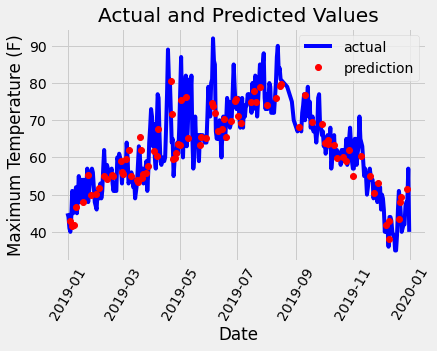

In [60]:
# Use datetime for creating date objects for plotting
import datetime# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

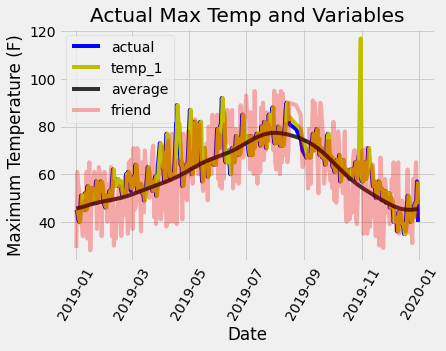

In [52]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)# Formatting plot
plt.legend(); plt.xticks(rotation = '60');# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

**Random Forest Classifier**

In [68]:
import os
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
data = pd.read_csv('BankNote_Authentication(1).csv')

In [70]:
data.head()



,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [71]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [72]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Checking for duplicate values

In [73]:
data.duplicated().sum()

24

In [76]:
data.drop_duplicates(subset=None, keep='first', inplace=True) #to drop those dupli vals
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

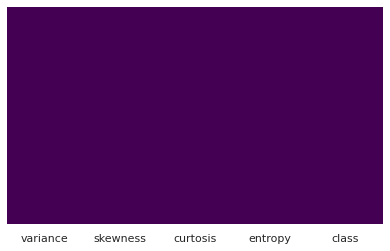

In [77]:
sns.heatmap(data.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

Based on the heatmap above, we can tell that there are no missing values which is good

Now we need to check if there are any outliers to remove them

In [78]:
def detect_outlier(data):
    outlier = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [79]:
var_list = data['variance'].tolist()
skew_list = data['skewness'].tolist()
curt_list = data['curtosis'].tolist()
entr_list = data['entropy'].tolist()

In [80]:
var_outlier = detect_outlier(var_list)
var_outlier


[]

In [82]:
skew_outlier = detect_outlier(skew_list)
skew_outlier



[]

In [83]:
curt_outlier = detect_outlier(curt_list)
curt_outlier



[15.6824,
 17.6772,
 14.9704,
 17.3087,
 15.5573,
 17.9274,
 16.9583,
 14.8881,
 17.5795,
 15.6773,
 17.6052,
 15.6199,
 17.1116,
 15.6559,
 17.0834,
 15.4417,
 16.7166,
 15.1606,
 17.5932]

In [84]:
entr_outlier = detect_outlier(entr_list)
entr_outlier

[-7.5034,
 -7.5836,
 -7.5034,
 -7.7853,
 -7.7581,
 -8.5482,
 -7.5487,
 -7.6418,
 -7.8719,
 -7.6612,
 -7.5034,
 -7.5344,
 -7.5887,
 -7.5642,
 -7.5887]

In [86]:
# Shape of Data before removing the outliers
print("Shape of Data before removing outliers: {}".format(data.shape))

data.drop(data[data['curtosis'] >= 14.8881].index, inplace = True)
data.drop(data[data['entropy'] <= -7.5034].index, inplace = True)

#Shape of Data after removing the outliers
print("Shape of Data before after outliers: {}".format(data.shape))


Shape of Data before removing outliers: (1314, 5)
Shape of Data before after outliers: (1314, 5)


Exploratory Data Analysis

0    0.554033
1    0.445967
Name: class, dtype: float64

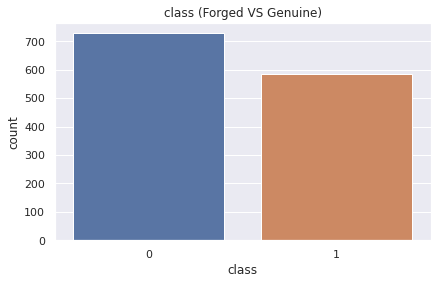

In [100]:
plt.figure(figsize =(6,4))
sns.set_style('darkgrid')
sns.countplot(x = 'class', data = data)
plt.title('class (Forged VS Genuine)')
data['class'].value_counts(normalize = True)





From the bar chart we can observe that the dataset seems to be balanced with forged notes being 56% and original notes 44%

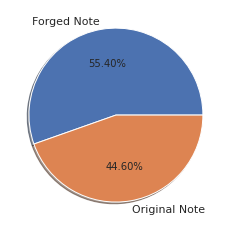

In [89]:
plt.pie(data['class'].value_counts(), labels = ['Forged Note', 'Original Note'], shadow = True, autopct = '%1.2f%%');


Now we need to make our model

In [90]:
data.head()



,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


we split our dataset

In [91]:
X = data.drop(['class'], axis = 1)
y = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
y_pred_1 = rfc.predict(X_train)
print(accuracy_score(y_pred_1, y_train))

1.0


we can already see that its giving us an accuracy score of 1

In [97]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       156

    accuracy                           1.00       329
   macro avg       1.00      1.00      1.00       329
weighted avg       1.00      1.00      1.00       329



In [98]:
print(confusion_matrix(y_test, y_pred_rfc))


[[173   0]
 [  0 156]]


In [99]:
print(accuracy_score(y_pred_rfc, y_test))

1.0
